In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pickle


In [2]:
dataset = pd.read_csv('diabetes_prediction_dataset.csv')


In [3]:
label_encoders = {}
for column in ['gender', 'smoking_history']:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])
    label_encoders[column] = le


In [4]:
features = ["gender", "age", "hypertension", "heart_disease", "smoking_history", 
            "bmi", "HbA1c_level", "blood_glucose_level"]
X = dataset[features]
Y = dataset["diabetes"]

In [5]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=30, stratify=Y)


In [7]:
model = LogisticRegression(class_weight='balanced', random_state=30)
model.fit(X_train, Y_train)

LogisticRegression(class_weight='balanced', random_state=30)

In [8]:
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

In [9]:
importances = np.abs(model.coef_[0])
sorted_features = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)
print("Feature Importances:")
for feat, imp in sorted_features:
    print(f"{feat}: {imp:.4f}")


Feature Importances:
HbA1c_level: 11.5652
bmi: 7.7274
blood_glucose_level: 6.6764
age: 3.8659
hypertension: 0.8125
heart_disease: 0.7587
gender: 0.5891
smoking_history: 0.4689


In [10]:
pickle.dump(model, open("diabetes_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
pickle.dump(label_encoders, open("label_encoders.pkl", "wb"))

In [11]:
plt.figure(figsize=(15, 8))


<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

Text(0.5, 1.0, 'Correlation Heatmap')

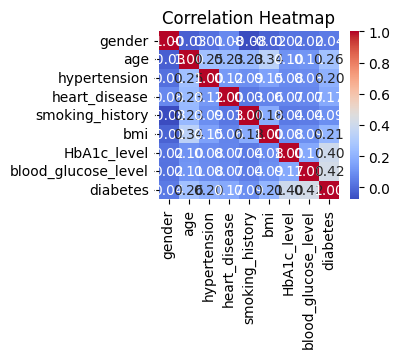

In [12]:
plt.subplot(2, 2, 1)
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Age vs Diabetes')

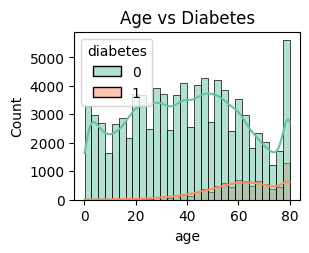

In [13]:
plt.subplot(2, 2, 2)
sns.histplot(data=dataset, x="age", hue="diabetes", kde=True, bins=30, palette='Set2')
plt.title('Age vs Diabetes')


C:\Users\Jatin Lakhani\AppData\Local\Temp\ipykernel_77600\491350261.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x="diabetes", y="bmi", palette="pastel")


Text(0.5, 1.0, 'BMI Distribution by Diabetes')

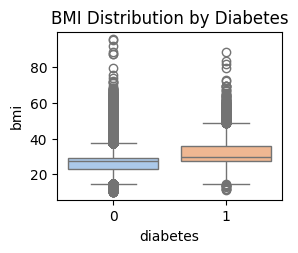

In [14]:
plt.subplot(2, 2, 3)
sns.boxplot(data=dataset, x="diabetes", y="bmi", palette="pastel")
plt.title('BMI Distribution by Diabetes')

Text(0.5, 1.0, 'Smoking History by Diabetes')

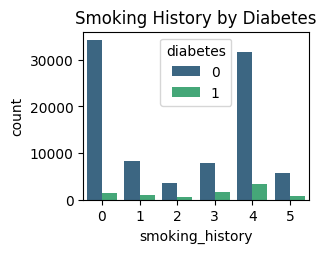

In [15]:
plt.subplot(2, 2, 4)
sns.countplot(data=dataset, x="smoking_history", hue="diabetes", palette="viridis")
plt.title('Smoking History by Diabetes')


In [16]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [17]:
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", report)


Model Accuracy: 88.76%

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94     27450
           1       0.42      0.89      0.57      2550

    accuracy                           0.89     30000
   macro avg       0.71      0.89      0.75     30000
weighted avg       0.94      0.89      0.90     30000

